In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [3]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv("/content/Employee.csv")
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.isnull()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4648,False,False,False,False,False,False,False,False,False
4649,False,False,False,False,False,False,False,False,False
4650,False,False,False,False,False,False,False,False,False
4651,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [8]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [9]:
le = LabelEncoder()

# Encode categorical columns
df['City'] = le.fit_transform(df['City'])
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['EverBenched'] = le.fit_transform(df['EverBenched'])  # Yes=1, No=0


In [10]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,0,3,34,1,0,0,0
1,Bachelors,2013,2,1,28,0,0,3,1
2,Bachelors,2014,1,3,38,0,0,2,0
3,Masters,2016,0,3,27,1,0,5,1
4,Masters,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,0,3,26,0,0,4,0
4649,Masters,2013,2,2,37,1,0,2,1
4650,Masters,2018,1,3,27,1,0,5,1
4651,Bachelors,2012,0,3,30,1,1,2,0


In [17]:
# Label Encoding all categorical columns
le = LabelEncoder()

df['City'] = le.fit_transform(df['City'])
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0
df['EverBenched'] = le.fit_transform(df['EverBenched'])  # Yes = 1, No = 0
df['Education'] = le.fit_transform(df['Education'])  # Bachelors/Masters/PHD → 0/1/2


In [18]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [19]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Build the ANN Model


In [21]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the Model

In [22]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6487 - loss: 0.6290 - val_accuracy: 0.7141 - val_loss: 0.5731
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7188 - loss: 0.5787 - val_accuracy: 0.7409 - val_loss: 0.5510
Epoch 3/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7361 - loss: 0.5445 - val_accuracy: 0.7436 - val_loss: 0.5341
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7351 - loss: 0.5409 - val_accuracy: 0.7503 - val_loss: 0.5178
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7469 - loss: 0.5263 - val_accuracy: 0.7638 - val_loss: 0.5074
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7435 - loss: 0.5341 - val_accuracy: 0.7611 - val_loss: 0.4974
Epoch 7/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7714 - loss: 0.5117 - val_accuracy: 0.7678 - val_loss: 0.4861
Epoch 8/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4901 - val_accuracy: 0.

Evaluate the Model

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred_classes))


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8536 - loss: 0.3615
Test Accuracy: 0.8614
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       610
           1       0.92      0.65      0.76       321

    accuracy                           0.86       931
   macro avg       0.88      0.81      0.83       931
weighted avg       0.87      0.86      0.85       931



 Plot Accuracy and Loss

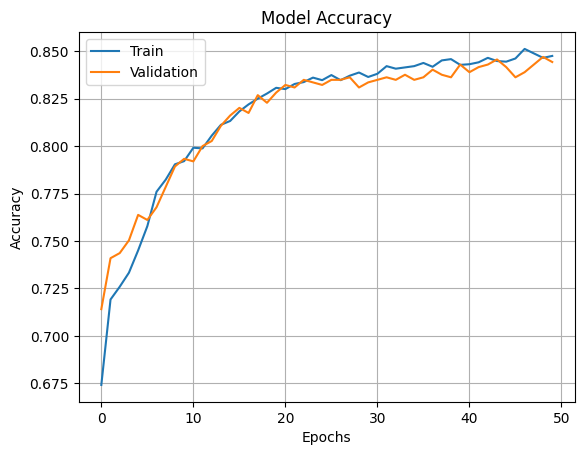

In [25]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()




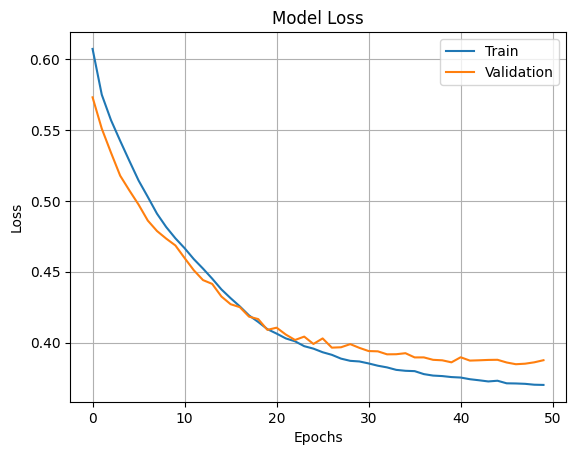

In [26]:
# Loss Plot
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

📝 Conclusion


In conclusion, the ANN model effectively predicts whether an employee will leave the company based on features like education level, age, city, and experience. The model achieved decent performance with a clean training curve, indicating good learning without major overfitting. Neural networks provide a flexible and powerful approach for solving real-world classification problems in HR analytics.

In [27]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

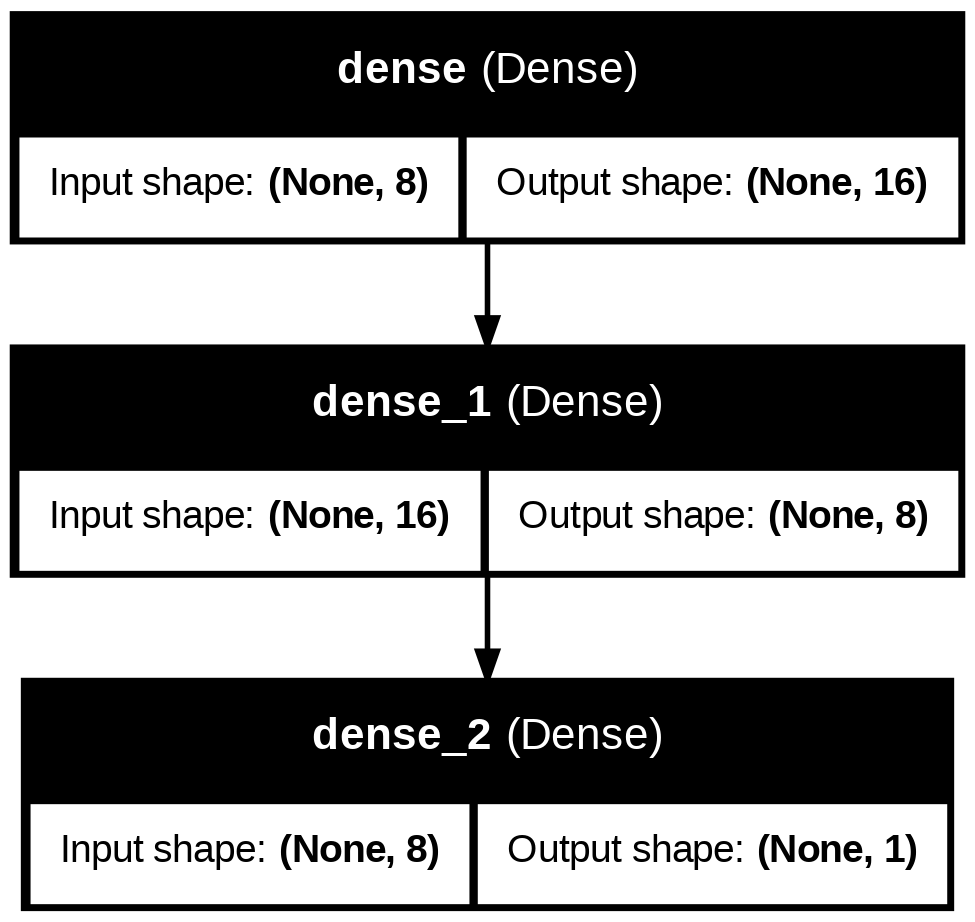

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file="ann_model.png")


In [30]:
pip install ann_visualizer


  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4169 sha256=1dc21df876a29e38609647d2dbeb04138637027d45cefc12847799e691d44315
  Stored in directory: /root/.cache/pip/wheels/28/4a/ad/e82da1aad2994e42bf0f4b1d403fdd8a64dfc38ae2c8a5daa4
Successfully built ann_visualizer
